# Giving Transaction Exploratory Data Analysis

### Section I: Data Cleaning

The purpose of this code is to clean the giving transactions data by conducting the following steps:

1. Identify all NaN values and NaN-heavy features
2. Drop NaN-heavy features
3. Drop observations w/ NaN values if the % of observations is <0.01% of the total observations
4. Convert all non-numeric datatypes to numeric

In [191]:
# import all necessary libraries
import pandas as pd

In [192]:
# import data
gt_df = pd.read_csv('./Payment Transactions 1999_2017.csv', encoding='cp437')

C:\Users\canderton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [193]:
# display data head
print(gt_df.head())

  Staff Member   Amount Payment Number GAU Allocation Name Scheduled Date  \
0          NaN    18.75     PMT-197286           ALL-99497            NaN   
1          NaN   300.00     PMT-201371          ALL-119924            NaN   
2          NaN   500.00      PMT-68703          ALL-119925            NaN   
3          NaN  3756.84      PMT-08521          ALL-119926            NaN   
4          NaN  1000.00      PMT-73062          ALL-262685            NaN   

  Payment Date Stage is Pipeline or Committed/Completed  \
0     4/1/2016                      Committed/Completed   
1    3/23/2016                      Committed/Completed   
2    3/23/2016                      Committed/Completed   
3    3/23/2016                      Committed/Completed   
4    3/23/2016                      Committed/Completed   

  Opportunity: Primary Campaign Source: Campaign Name  \
0                    BOS-MA: FY16 Ambassadors Giving    
1                                  COL-SC: FY16 Gala    
2          

In [194]:
# display sum of nulls & dataframe shape
print(gt_df.isnull().sum())
print(gt_df.shape)

Staff Member                                              919
Amount                                                      0
Payment Number                                              0
GAU Allocation Name                                         0
Scheduled Date                                         189831
Payment Date                                                2
Stage is Pipeline or Committed/Completed                    0
Opportunity: Primary Campaign Source: Campaign Name        12
Opportunity: Legacy SF ID                                   0
Opportunity: Opportunity ID                                 0
Opportunity: Donor Id                                       0
Legacy SF ID                                                7
Legacy SF ID.1                                              7
Payment Status                                              0
dtype: int64
(189833, 14)


Since only one feature contains a significant number of NaNs, we can eliminate that feature for future use.

We can also eliminate the remaining observations that contain NaNs since they only contain <0.01% of our total data.

In [195]:
gt_df = gt_df.loc[:, gt_df.columns != 'Scheduled Date']
gt_df = gt_df.dropna()
print(gt_df.isnull().sum())

Staff Member                                           0
Amount                                                 0
Payment Number                                         0
GAU Allocation Name                                    0
Payment Date                                           0
Stage is Pipeline or Committed/Completed               0
Opportunity: Primary Campaign Source: Campaign Name    0
Opportunity: Legacy SF ID                              0
Opportunity: Opportunity ID                            0
Opportunity: Donor Id                                  0
Legacy SF ID                                           0
Legacy SF ID.1                                         0
Payment Status                                         0
dtype: int64


We now see that all observations w/ NaNs have been eliminated and the feature containing >50% NaNs has been dropped, our data is mostly 'clean'

Now, we must convert all non-numeric values (object-based categoricals, for example) so we can run our clustering algorithms.

In [196]:
# dispaly datatypes of existing DF
print(gt_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188895 entries, 561 to 189832
Data columns (total 13 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Staff Member                                         188895 non-null  object 
 1   Amount                                               188895 non-null  float64
 2   Payment Number                                       188895 non-null  object 
 3   GAU Allocation Name                                  188895 non-null  object 
 4   Payment Date                                         188895 non-null  object 
 5   Stage is Pipeline or Committed/Completed             188895 non-null  object 
 6   Opportunity: Primary Campaign Source: Campaign Name  188895 non-null  object 
 7   Opportunity: Legacy SF ID                            188895 non-null  object 
 8   Opportunity: Opportunity ID                         

In [197]:
# clean & convert the staff member #s to integers
gt_df['Staff Member'] = gt_df['Staff Member'].str[6:-1]
gt_df['Staff Member'] = pd.to_numeric(gt_df['Staff Member'])

# print new integer based staff member column
gt_df['Staff Member']

561        7.0
562        7.0
563        7.0
564        7.0
565        7.0
          ... 
189821    26.0
189822    26.0
189830    27.0
189831    27.0
189832    27.0
Name: Staff Member, Length: 188895, dtype: float64

In [198]:
# clean & convert the Payment Number to integers
gt_df['Payment Number'] = gt_df['Payment Number'].str[4:-1]
gt_df['Payment Number'] = pd.to_numeric(gt_df['Payment Number'])

# print new integer based Payment Number column
gt_df['Payment Number']

561        1169
562        6709
563        6709
564        7109
565        6709
          ...  
189821     4837
189822     4837
189830     1940
189831    13448
189832     8459
Name: Payment Number, Length: 188895, dtype: int64

In [199]:
# clean & convert the GAU Allocation Name to integers
gt_df['GAU Allocation Name'] = gt_df['GAU Allocation Name'].str[4:-1]
gt_df['GAU Allocation Name'] = pd.to_numeric(gt_df['GAU Allocation Name'])

# print new integer based GAU Allocation Name column
gt_df['GAU Allocation Name']

561       15674
562        8201
563        8201
564       14341
565        8202
          ...  
189821    16739
189822    16780
189830    19311
189831    24103
189832    24188
Name: GAU Allocation Name, Length: 188895, dtype: int64

In [200]:
# convert Payment Date to datetime format
gt_df['Payment Date'] =  pd.to_datetime(gt_df['Payment Date'], format = '%m/%d/%Y')

# display new datetime column to cross check
gt_df['Payment Date']

561      2004-06-08
562      2015-04-13
563      2015-04-13
564      2015-07-16
565      2015-04-13
            ...    
189821   2017-04-25
189822   2016-10-27
189830   2017-03-31
189831   2013-08-28
189832   2013-02-11
Name: Payment Date, Length: 188895, dtype: datetime64[ns]

In [201]:
# print new integer based Stage is Pipeline or Committed/Completed Name column
set(gt_df['Stage is Pipeline or Committed/Completed'])

{'Committed/Completed'}

This tells us that every entry has 'Committed/Completed', with 0 variance. We can eliminate that feature simply because it will provide no value.

In [202]:
gt_df = gt_df.loc[:, gt_df.columns != 'Stage is Pipeline or Committed/Completed']
print(gt_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188895 entries, 561 to 189832
Data columns (total 12 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   Staff Member                                         188802 non-null  float64       
 1   Amount                                               188895 non-null  float64       
 2   Payment Number                                       188895 non-null  int64         
 3   GAU Allocation Name                                  188895 non-null  int64         
 4   Payment Date                                         188895 non-null  datetime64[ns]
 5   Opportunity: Primary Campaign Source: Campaign Name  188895 non-null  object        
 6   Opportunity: Legacy SF ID                            188895 non-null  object        
 7   Opportunity: Opportunity ID                          188895 non-null  ob

In [203]:
# also we are gonna rename this column because its too long and it annoys me
gt_df = gt_df.rename(columns={"Opportunity: Primary Campaign Source: Campaign Name": "Campaign Name"})
print(gt_df['Campaign Name'])

561                              04 NAT EVT
562                                   UNSOL
563                                   UNSOL
564           DET-MI: FY16 Team Sponsorship
565                                   UNSOL
                        ...                
189821    JAX-FL: FY17 Program Sponsorships
189822    JAX-FL: FY17 Program Sponsorships
189830                    MWK-WI: FY17 Gala
189831              FY13 Team Sponsors HALF
189832                                 WSWC
Name: Campaign Name, Length: 188895, dtype: object


In [204]:
# our first categorical feature, we will convert this differently than the previous datetimes/float values
print(set(gt_df['Campaign Name']))

print('There are {} different campaigns that City Year has ran since 1997.'.format(len(set(gt_df['Campaign Name']))))

{'LOS-CA: FY16 Associates Board Giving', '80000-NH12:Tickets', 'PHL: FY13 Gala', '07 SEA IGC', 'MWK-WI: FY16 Sustainable Personalized Ask', 'SNJ-CA: FY18 Red Jacket Society', 'NYC: FY13 Gala:Table', 'DEN-CO: FY14 Gala Red Jacket', '07 CLE OPEN', '80000-SEA09:VIPTKT', '07 CLE EVT', 'COL-OH: FY13 Gala:Freshmen Sponsorship', 'FY10 OTHER INCOME', '08 SEA EVT', '07 LSA ERND', '06 ESEA', '80000-BOS08:08 Donation', '06 NAT DIN:06 Gold', 'COL-SC: FY15 Gala Night of Ask', '04 BOS CMP:SPON', '06 SANJ G', '80000-DET09:8TKTS', 'CLE-OH: FY17 Multi Event Sponsorship', '06 LRA YH', '07 SAN DIN', '07 CHI IGC:ABD', '80040:Honor of Michael Bro', '04 COL CAMP', 'LOS-CA: FY16 December Appeal', '06 CSC SRVSP', '06 NAT APP:SPRINGPD', 'NYC: FY12AlumBrd:Donation', 'MWK-WI: FY14 Gala Sustainable Sponsorships', '05 COL SRVSP', '07 DET APP:FALLPD', '04 PHL GEN', 'SAC-CA: FY17 Team Sponsorships', 'NH: FY13 Bike Race:Donations', '06 DET YH', '05 SAN ERND', '05 NAT PROG:Clinton Innovation A', 'PHL-PA: FY18 CY Paint

well fuck

In [205]:
# create new dataframe containing campaign names and corresponding campaign category codes that we assign
campaign_df = pd.DataFrame()
campaign_df['Campaign Cat Code'] = list(set(gt_df['Campaign Name'].astype("category").cat.codes))
campaign_df['Campaign Name'] = list(set(gt_df['Campaign Name']))

In [206]:
# theoretically, this is how we should handle all cateogrical variables, so I'm going to run with this sparse/non-sparse
# matrix for the time being
gt_df_sparse = pd.get_dummies(gt_df, columns=['Campaign Name'])

In [207]:
# this maps the campaign codes onto their names in a single column, but since the campaigns are not inherently relational
# we should absolutely NOT do this
#gt_df['Campaign Name'] = gt_df['Campaign Name'].astype("category").cat.codes

Since there were ~4800 different campaigns that City Year has conducted since '97, we are forced to serialize those campaigns into numbers which we use to replace the names.

We will also create a separate dataframe containing a correlation between campaign names and category codes, for future use.

In [208]:
# print new head of gt_df that contains the campaign codes instead of names, therefore categorizing the data 
# (we might need to make this a sparse matrix at some point as well, but for now we will just not add 4807 features for simplicity)

print('The new dataframe shape is {}.'.format(gt_df_sparse.shape))

The new dataframe shape is (188895, 4818).


Thankfully, the remaining data (aside from payment status) is useless since it is just a variety of identification numbers. We will only use that for joins in the future and store them aside.

In [209]:
# clean our final column, payment status
gt_df_sparse = gt_df_sparse.loc[:, gt_df_sparse.columns != 'Opportunity: Legacy SF ID']
gt_df_sparse = gt_df_sparse.loc[:, gt_df_sparse.columns != 'Opportunity: Opportunity ID']
gt_df_sparse = gt_df_sparse.loc[:, gt_df_sparse.columns != 'Opportunity: Donor Id']
gt_df_sparse = gt_df_sparse.loc[:, gt_df_sparse.columns != 'Legacy SF ID']
gt_df_sparse = gt_df_sparse.loc[:, gt_df_sparse.columns != 'Legacy SF ID.1']

# print new, ID feature dropped DF
gt_df_sparse.head()

,Staff Member,Amount,Payment Number,GAU Allocation Name,Payment Date,Payment Status,Campaign Name_01 RHI APP,Campaign Name_01 RHI CAMP,Campaign Name_01 RHI CYZ,Campaign Name_01 RHI DIN,...,Campaign Name_Wine Tasting:Donation,Campaign Name_Wine Tasting:sponsor,Campaign Name_YH,Campaign Name_Young Heroes,Campaign Name_Young Heroes Sponsor,Campaign Name_Young Heroes Sponsor:YHAA,Campaign Name_Young Heroes Sponsor:YHOPEN,Campaign Name_Young Heroes Sponsor:YHOTHER,Campaign Name_Young Heroes Sponsor:YHPRSPON,Campaign Name_Young Heroes Sponsor:YHTSP
561,7.0,50000.0,1169,15674,2004-06-08,Paid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
562,7.0,200.0,6709,8201,2015-04-13,Paid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563,7.0,200.0,6709,8201,2015-04-13,Paid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,7.0,100000.0,7109,14341,2015-07-16,Paid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,7.0,300.0,6709,8202,2015-04-13,Paid,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
# convert Payment Status column to boolean values
gt_df_sparse['Payment Status'] = gt_df_sparse['Payment Status'].map({"Paid":1, "Unpaid":0})
gt_df_sparse['Payment Status'] = gt_df_sparse['Payment Status'].astype(bool)

In [211]:
# finally, we check our new Sparse matrix for datatypes/NaNs
gt_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188895 entries, 561 to 189832
Columns: 4813 entries, Staff Member to Campaign Name_Young Heroes Sponsor:YHTSP
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), uint8(4807)
memory usage: 874.8 MB


In [212]:
# lets also create the matrix that contains categorical numeric data and not sparse data
gt_df_cat = gt_df_sparse.drop(gt_df_sparse.columns[5:-1], axis=1)
gt_df_cat = gt_df_cat.drop(gt_df_cat.columns[5], axis=1)
gt_df_cat['Payment Status'] = gt_df_sparse['Payment Status']
gt_df_cat['Campaign Cat Number'] = gt_df['Campaign Name'].astype("category").cat.codes
gt_df_cat.head()

,Staff Member,Amount,Payment Number,GAU Allocation Name,Payment Date,Payment Status,Campaign Cat Number
561,7.0,50000.0,1169,15674,2004-06-08,True,132
562,7.0,200.0,6709,8201,2015-04-13,True,4659
563,7.0,200.0,6709,8201,2015-04-13,True,4659
564,7.0,100000.0,7109,14341,2015-07-16,True,3540
565,7.0,300.0,6709,8202,2015-04-13,True,4659


In [213]:
gt_df_cat = gt_df_cat.dropna()
gt_df_sparse = gt_df_sparse.dropna()

We now have two important dataframes to run models with, the first being 'gt_df_sparse' which breaks the categorical feature of 'Campaign Name' into N number of boolean features.

The second dataframe (gt_df_cat) serializes campaign names into numeric values instead of stretching them into boolean features. Both have their uses, but gt_df_cat is significantly better with computational capacity.

### Section II: Model Training

In [214]:
from sklearn import cluster
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import pairwise_distances
import random

In [215]:
X_cluster = gt_df_cat['Amount']
X_cluster = list(X_cluster.to_numpy())
X_limited = random.sample(X_cluster, 10000)
X_limited = np.array(X_limited).reshape(-1,1)

In [216]:
# silhouette score calculation for n_clusters = 10-1000 step size 10
calc_ss = True
if calc_ss:
    # create empty lists for clustering algo to append silhouette scores to for plotting
    cluster_n_list = range(10, 500, 10)
    ss_list = []
    for i in cluster_n_list:
        # train unsupervised KNN model on giving data to determine clusters for donations
        k_means = cluster.KMeans(n_clusters=i)
        k_means.fit(X_limited)
        pairs = pairwise_distances(X_limited)
        cur_ss = silhouette_score(pairs, k_means.labels_)
        print("Avg. Silhouette Score is: {}".format(cur_ss))
        ss_list.append(cur_ss)

Avg. Silhouette Score is: 0.8878602246827635
Avg. Silhouette Score is: 0.8662488342354294
Avg. Silhouette Score is: 0.8083331518533622
Avg. Silhouette Score is: 0.7618338344976998
Avg. Silhouette Score is: 0.7669151114589027
Avg. Silhouette Score is: 0.7493210527357991
Avg. Silhouette Score is: 0.7406130887832058
Avg. Silhouette Score is: 0.7483271160841145
Avg. Silhouette Score is: 0.7550310154881249
Avg. Silhouette Score is: 0.7426330362735394
Avg. Silhouette Score is: 0.733555907722157
Avg. Silhouette Score is: 0.7751818141262568
Avg. Silhouette Score is: 0.7630471350896292
Avg. Silhouette Score is: 0.77964069693354
Avg. Silhouette Score is: 0.7893471546298417
Avg. Silhouette Score is: 0.8085716544429723
Avg. Silhouette Score is: 0.8125914128246289
Avg. Silhouette Score is: 0.8060264779670213
Avg. Silhouette Score is: 0.7835677293150745
Avg. Silhouette Score is: 0.8196570218455774
Avg. Silhouette Score is: 0.8338877977481592
Avg. Silhouette Score is: 0.8348347677199613
Avg. Silhouet

In [217]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'KMeans Clustering Silhouette Analysis')

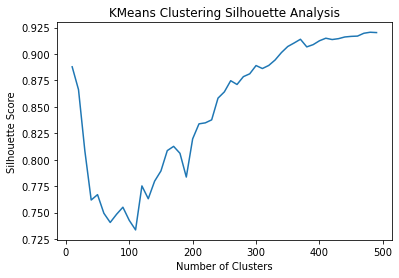

In [218]:
# plotting of silhouette score, clusters_n = 10-1000 w/ step size 10
plt.plot(cluster_n_list, ss_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("KMeans Clustering Silhouette Analysis")

In [219]:
print("Highest Silhouette Score: {}".format(max(ss_list)))
print("Optimal # of Clusters based on SS: {}".format(10 + (ss_list.index(max(ss_list)) * 10)))

Highest Silhouette Score: 0.9205400845056463
Optimal # of Clusters based on SS: 480


In [220]:
# Silhouette score of 2-10 clusters calculations
calc_ss = False
if calc_ss:
    # create empty lists for clustering algo to append silhouette scores to for plotting
    cluster_n_list = range(2, 10)
    ss_list = []
    for i in cluster_n_list:
        # train unsupervised KNN model on giving data to determine clusters for donations
        k_means = cluster.KMeans(n_clusters=i)
        k_means.fit(X_limited)
        pairs = pairwise_distances(X_limited)
        cur_ss = silhouette_score(pairs, k_means.labels_)
        print("Avg. Silhouette Score is: {}".format(cur_ss))
        ss_list.append(cur_ss)

Text(0.5, 1.0, 'KMeans Clustering Silhouette Analysis')

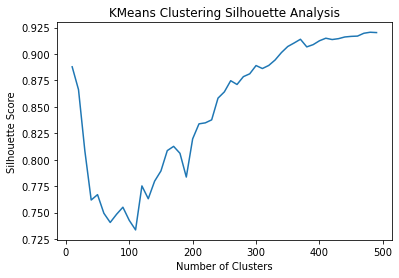

In [221]:
# Silhouette score of 2-10 clusters
plt.plot(cluster_n_list, ss_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("KMeans Clustering Silhouette Analysis")

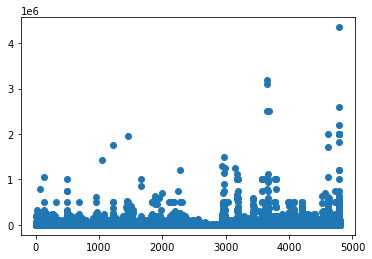

In [222]:
# scatterplot of the data, campaign vs. amount given in each campaign
plt.scatter(gt_df_cat['Campaign Cat Number'], gt_df_cat['Amount'])

In [223]:
from sklearn.neighbors import KernelDensity

In [224]:
kd = KernelDensity(kernel="exponential")
kd.fit(X_limited)
kd.score_samples(X_limited)

array([-8.11172808, -5.37088806, -4.40034399, ..., -3.60823171,
       -4.27950597, -3.74290854])

<AxesSubplot:ylabel='Density'>

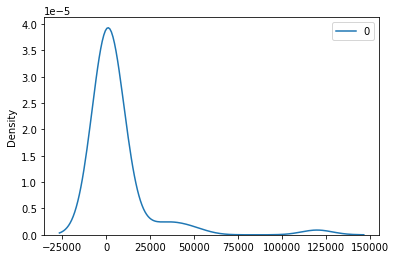

In [225]:
import seaborn as sns
sns.kdeplot(data=X_limited[0:50])